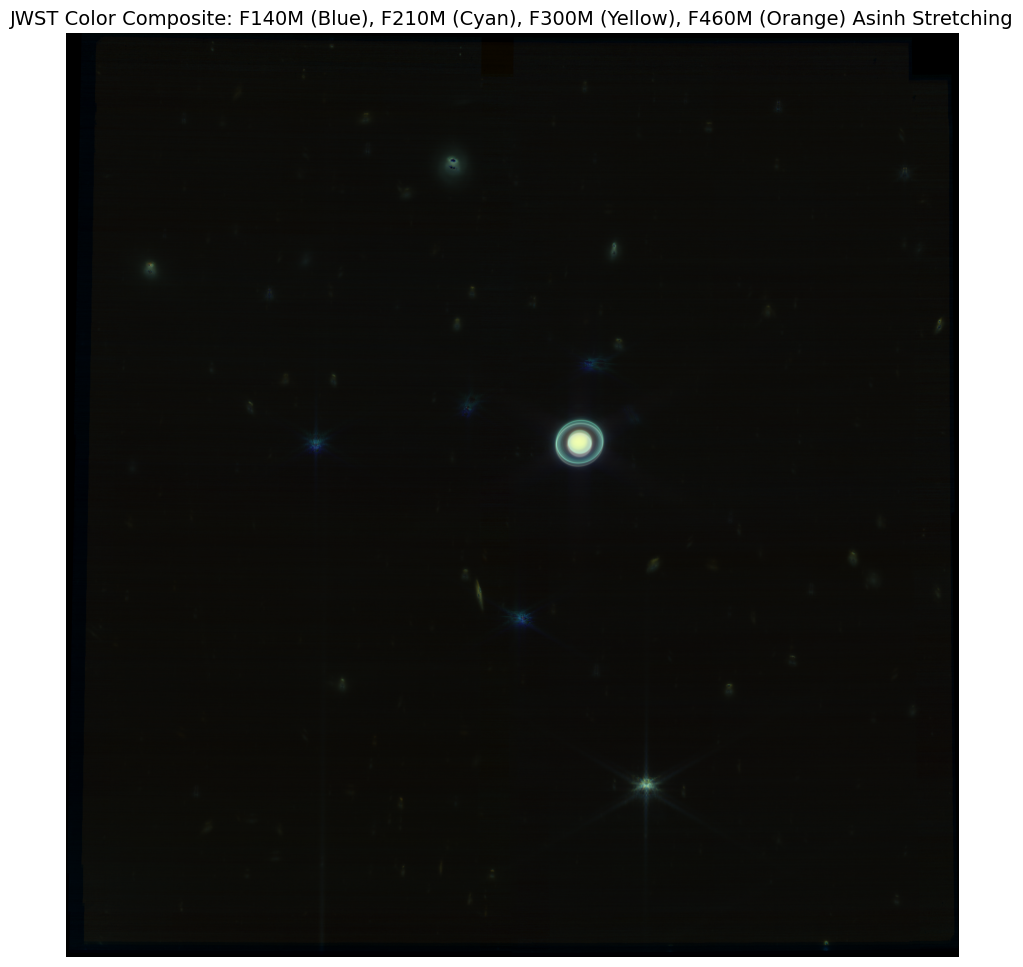

In [37]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage.transform import resize

files = {
    'F140M': 'reprojected/F140M.fits',
    'F210M': 'reprojected/F210M.fits',
    'F300M': 'reprojected/F300M.fits',
    'F460M': 'reprojected/F460M.fits',
}

# Load and preprocess each image
def load_and_clean_asinh(filename):
    data = fits.open(filename)[0].data
    data = np.nan_to_num(data, nan=0.0)
    data[data < 0] = 0
    return np.asinh(data + 1e-3)

def load_and_clean_log(filename):
    data = fits.open(filename)[0].data
    data = np.nan_to_num(data, nan=0.0)
    data[data < 0] = 0
    return np.log10(data + 1e-3)

def normalize(image):
    return rescale_intensity(image, in_range='image', out_range=(0, 1))



# Load all four images
f140 = normalize(load_and_clean_asinh(files['F140M']))
f210 = normalize(load_and_clean_asinh(files['F210M']))
f300 = normalize(load_and_clean_asinh(files['F300M']))
f460 = normalize(load_and_clean_asinh(files['F460M']))

# Find the smallest shape among all images
min_shape = (min(f140.shape[0], f210.shape[0], f300.shape[0], f460.shape[0]),
             min(f140.shape[1], f210.shape[1], f300.shape[1], f460.shape[1]))

# Resize all images to the smallest shape
f140_resized = resize(f140, min_shape, mode='reflect', anti_aliasing=True)
f210_resized = resize(f210, min_shape, mode='reflect', anti_aliasing=True)
f300_resized = resize(f300, min_shape, mode='reflect', anti_aliasing=True)
f460_resized = resize(f460, min_shape, mode='reflect', anti_aliasing=True)

# Build RGB channels
r = f300_resized + f460_resized * 1.0
g = f210_resized + f300_resized + f460_resized * 0.5
b = f140_resized + f210_resized

# Stack and normalize RGB image
rgb = np.stack([r, g, b], axis=-1)
rgb = np.clip(rgb / np.max(rgb), 0, 1)

plt.figure(figsize=(12, 12))
plt.imshow(rgb, origin='lower')
plt.title("JWST Color Composite: F140M (Blue), F210M (Cyan), F300M (Yellow), F460M (Orange) Asinh Stretching", fontsize=14)
plt.axis('off')
plt.show()


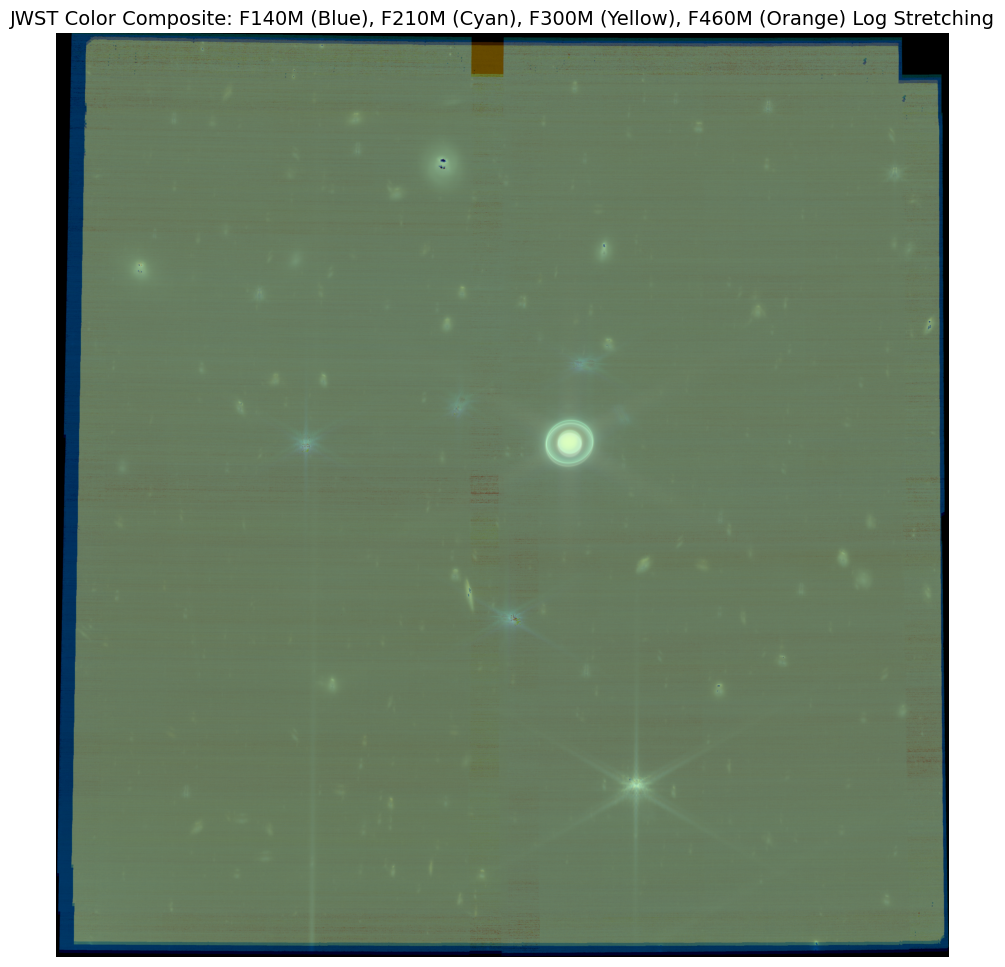

In [38]:
# Load all four images
f140 = normalize(load_and_clean_log(files['F140M']))
f210 = normalize(load_and_clean_log(files['F210M']))
f300 = normalize(load_and_clean_log(files['F300M']))
f460 = normalize(load_and_clean_log(files['F460M']))

# Find the smallest shape among all images
min_shape = (min(f140.shape[0], f210.shape[0], f300.shape[0], f460.shape[0]),
             min(f140.shape[1], f210.shape[1], f300.shape[1], f460.shape[1]))

# Resize all images to the smallest shape
f140_resized = resize(f140, min_shape, mode='reflect', anti_aliasing=True)
f210_resized = resize(f210, min_shape, mode='reflect', anti_aliasing=True)
f300_resized = resize(f300, min_shape, mode='reflect', anti_aliasing=True)
f460_resized = resize(f460, min_shape, mode='reflect', anti_aliasing=True)

# Build RGB channels
r = f300_resized + f460_resized * 1.0
g = f210_resized + f300_resized + f460_resized * 0.5
b = f140_resized + f210_resized

# Stack and normalize RGB image
rgb = np.stack([r, g, b], axis=-1)
rgb = np.clip(rgb / np.max(rgb), 0, 1)

plt.figure(figsize=(12, 12))
plt.imshow(rgb, origin='lower')
plt.title("JWST Color Composite: F140M (Blue), F210M (Cyan), F300M (Yellow), F460M (Orange) Log Stretching", fontsize=14)
plt.axis('off')
plt.show()
